![logo](logo/DaftCode_logo_854x210.jpg)

# Selekcja predyktorów  - na przykładzie danych `digits`

## Charakterystyka danych

In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

ImportError: libSM.so.6: cannot open shared object file: No such file or directory

In [3]:
X.shape

NameError: name 'X' is not defined

In [4]:
pd.DataFrame(X).head()

NameError: name 'pd' is not defined

In [3]:
def plot_dig(i):
    fig = plt.matshow(digits.images[[i]][0], cmap=plt.cm.Blues)
    plt.colorbar()
    plt.show()
    return fig

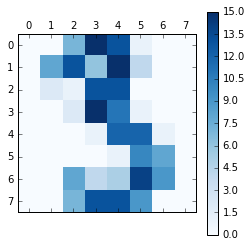

In [4]:
plot_dig(3)

In [5]:
unique, counts = np.unique(y, return_counts=True)

In [6]:
zip(unique, counts)

[(0, 178),
 (1, 182),
 (2, 177),
 (3, 183),
 (4, 181),
 (5, 182),
 (6, 181),
 (7, 179),
 (8, 174),
 (9, 180)]

## Regularyzacja L1

Przykładowe funkcje kryterialne

$ LM: \quad f(\mathbf{X}, \mathbf{y},  \mathbf{w}) = \sum_{i=1}^N (y_i - \mathbf{w}^Tx_i)^2 $

$ RL: \quad f(\mathbf{X},  \mathbf{y},  \mathbf{w}) = \sum_{i=1}^N \left\{ \log(1+\exp(\mathbf{w}^Tx_i) ) - y_i \mathbf{w}^T x_i \right\}$

$ SVM: \quad f(\mathbf{X},  \mathbf{y}, \mathbf{w}, b) = \frac{||\mathbf{w}||^2}{2} + \lambda\sum_{i=1}^N \max(0, 1-y_i(w_i x_i - b)) $

Optymalizacja (minimalizacja) funkcji celu $f(\mathbf{w})$ na okręgu w przestrzeni $L_1$ (tzn. pod warunkiem $\sum_{j=1}^p |w_j| < t$)

![lasso](lasso.png)
![plot_lasso_lars](plot_lasso_lars.png)

### Przykład 1. SVM + LASSO

$$Crit(\mathbf{X}, \mathbf{y}, \mathbf{w}) = f(\mathbf{X}, \mathbf{y},  \mathbf{w})  + \frac{1}{R} \mathcal{L}_p(\mathbf{w}) = \frac{1}{R} \left(R \cdot f(\mathbf{X}, \mathbf{y},  \mathbf{w})  + \mathcal{L}_p(\mathbf{w}) \right) $$

$$ Crit(\mathbf{X}, \mathbf{y}, \mathbf{w}) \propto C \cdot f(\mathbf{X}, \mathbf{y},  \mathbf{w})  + \mathcal{L}_p(\mathbf{w}) $$

In [27]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


print('Old shape: %d x %d' % X.shape)
## Czym wyższe C tym więcej cech
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, multi_class='ovr')
lsvc.fit(X, y)
# lsvc.transform(X).shape
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print('New shape: %d x %d' % X_new.shape)

Old shape: 1797 x 64
New shape: 1797 x 47


In [28]:
lsvc.coef_.shape

(10, 64)

In [29]:
pd.DataFrame(lsvc.coef_)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.000000,0.000000,0.000000,-0.023659,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,-0.006167,0.000000,0.000000,-0.024767,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000,-0.065982,0.027187,0.000000,0.0,0.0,-0.048884,...,-0.009215,0.0,0.0,0.0,-0.042710,0.000000,0.000000,0.005672,0.000000,0.004923
2,0.0,0.0,0.000000,0.000000,0.000000,-0.029180,0.000000,0.0,0.0,0.000000,...,0.004724,0.0,0.0,0.0,0.007949,0.000000,0.000000,0.004363,0.049211,0.000000
3,0.0,0.0,0.000000,0.000000,0.030462,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.010769,-0.027845
4,0.0,0.0,-0.010460,-0.076075,0.000000,-0.068071,-0.008156,0.0,0.0,0.000000,...,-0.041302,0.0,0.0,0.0,0.000000,-0.010156,0.000000,-0.043222,0.000000,0.000000
5,0.0,0.0,0.037186,0.000000,0.000000,0.042538,0.018351,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.004117,-0.028586,-0.019037,0.000000
6,0.0,0.0,-0.053600,0.000000,-0.008877,-0.021371,0.000000,0.0,0.0,-0.017957,...,0.000950,0.0,0.0,0.0,0.000000,-0.016459,-0.008548,0.011082,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.000000,0.026394,0.023911,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.038980,-0.053047,0.000000,0.000000
8,0.0,0.0,0.000000,-0.036394,-0.007640,-0.009641,-0.045261,0.0,0.0,0.000000,...,-0.009271,0.0,0.0,0.0,-0.057952,0.000000,0.000000,-0.034063,-0.012588,0.000000
9,0.0,0.0,0.000000,0.000000,-0.010350,-0.036178,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,-0.017977,-0.007327,0.000000,-0.015720,0.000000,0.000000


In [30]:
def compare(i):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ranking = lsvc.coef_[i,:].reshape(digits.images[0].shape)
    fig1 = ax2.matshow(ranking)
    fig2 = ax1.matshow(digits.images[[i]][0], cmap=plt.cm.Blues)
    plt.colorbar(fig1, ax=ax2)
    plt.colorbar(fig2, ax=ax1)
    plt.show()

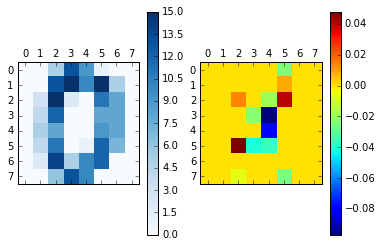

In [31]:
compare(0)

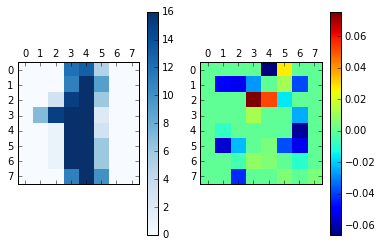

In [32]:
compare(1)

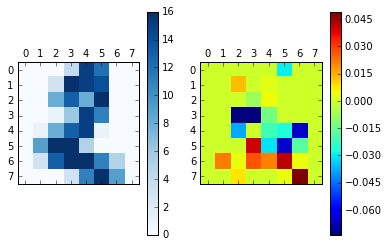

In [12]:
compare(2)

## Rekurencyjna eliminacja cech (ang. _Recursive Feature Elimination_)

1. Dopasowanie modelu (np. lasy losowe)
2. Uporządkowanie predyktorów po ich istotności dla zbudowanego modelu ($F_1>F_2>...$)
3. Dla danego kroku (`step`) na predyktorach $F_1 : F_{k\cdot step}$ (zmniejszając ich liczbę, a więc dla malejącej wartości $k$) budujemy od nowa model i liczymy zadaną metrykę na zbiorze walidacyjnym.
4. Wybieramy model o predyktorach odpowiadających optymalnemu wynikowy metryki.


### Przykład 2. RFE + Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=10, step=2)
rfe.fit(X,y)
print('Old shape: %d x %d' % X.shape)
print('New shape: %d x %d' % (X.shape[0], rfe.n_features_))

Old shape: 1797 x 64
New shape: 1797 x 10


[[28 20 11 18 14  6 17 22]
 [23 16  1 16 13  3 18 22]
 [24 15  7  1  1  1 19 23]
 [24 13  1  8  2  4  7 27]
 [25  4  5 15  1  8  1 26]
 [26 17  1  1  5 10 12 25]
 [27 21 10  3 12  9  2 21]
 [28 20 11 14  6  1  9 19]]


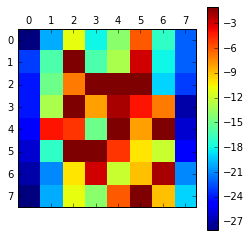

In [47]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)
print ranking
plt.matshow(-ranking)
plt.colorbar()

In [57]:
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf, step=1)
rfecv.fit(X,y)
print('Old shape: %d x %d' % X.shape)
print('New shape: %d x %d' % (X.shape[0], rfecv.n_features_))

Old shape: 1797 x 64
New shape: 1797 x 56


[[9 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2]
 [8 1 1 1 1 1 1 3]
 [4 1 1 1 1 1 1 5]
 [6 1 1 1 1 1 1 1]
 [7 1 1 1 1 1 1 1]]


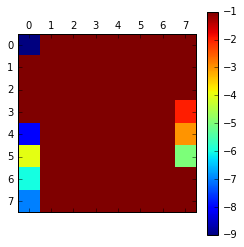

In [58]:
ranking = rfecv.ranking_.reshape(digits.images[0].shape)
print ranking
plt.matshow(-ranking)
plt.colorbar()

## Procedury permutacyjne

1. Podziel zbiór na część treningową $X_{tr}$ i walidacyjną $X_{val}$.
1. Zbuduj model na zbiorze $X_{tr}$ o $p$ cechach $F_1, F_2, ..., F_p$.
2. Dla ustalonej cechy $F_j$:
      * Permutuj wartości w cesze $F_j$ na zbiorze $X_{val}$.
      * Na zbiorze $X_{val}^j$ wykonaj predykcję i oblicz metrykę modelu (log_loss, pole pod krzywą ROC, etc.)

In [ ]:
from sklearn.cross_validation import ShuffleSplit
from collections import defaultdict
from sklearn.datasets import load_boston
import numpy as np
#Load boston housing dataset as an example

names = map(str, range(X.shape[1]))

rf = RandomForestClassifier()
scores = defaultdict(list)
 
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]
    r = rf.fit(X_train, Y_train)
    bin_accuracy = (rf.predict(X_test) == Y_test)
    acc = bin_accuracy.mean()
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        bin_accuracy = (rf.predict(X_t) == Y_test)
        shuffle_acc = bin_accuracy.mean()
        sc = (acc - shuffle_acc)/acc
        scores[names[i]].append(sc)
print "Features sorted by their score:"
mn_scores = [(round(np.mean(score), 4), feat) for feat, score in scores.items()]
print sorted(mn_scores, reverse=True)

/home/model/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[ 0.      0.0004  0.0065  0.0021  0.0018  0.0065  0.0017  0.0001]
 [ 0.      0.0015  0.0075  0.0016  0.0044  0.0089  0.0005  0.0001]
 [ 0.      0.0013  0.0081  0.0093  0.0108  0.0512  0.0019 -0.    ]
 [-0.      0.0034  0.0317  0.0107  0.0127  0.0075  0.0145  0.    ]
 [ 0.      0.0138  0.0099  0.0052  0.0154  0.0043  0.0155  0.    ]
 [ 0.      0.0019  0.0297  0.0475  0.0058  0.007   0.0041  0.    ]
 [ 0.      0.0002  0.0069  0.0084  0.0019  0.0083  0.011   0.0001]
 [ 0.      0.0001  0.0052  0.0015  0.0099  0.0107  0.0043  0.0006]]


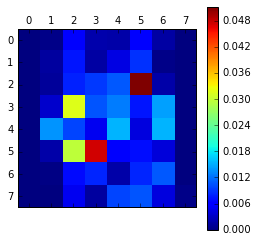

In [18]:
mn_scores.sort(key=lambda x: int(x[1]))
mn_scores = [x[0] for x in mn_scores]
importance = np.array(mn_scores).reshape(digits.images[0].shape)
print importance
plt.matshow(importance)
plt.colorbar()

## Odnośniki

- Skalowanie parametru $C$ w SVC: http://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html
- Permutacja w zagadnieniu  _feature selection_: http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
- Selekcja cech w sklearn: http://scikit-learn.org/stable/modules/feature_selection.html

## Polecenia naprowadzające

1. Napisz transformacje przyjmujące `X` i `y`, które zwrócą ramkę `X'` zawierającą najistotniejsze cechy:
        a) wykorzystującą permutacyjną procedurę wyboru cech
        b) wykorzystującą regularyzację L1 i/lub L2
        c) wykorzystującą rekursywną eliminację cech
        d) wykorzystującą dowolną inną ulubioną metodę feature selection
Każdą transformację zaimplementuj jako oddzielny moduł pythonowy, który będzie łatwo importowany do głównego skryptu z Waszym modelem (o tym jak to robić opowie za chwilę Maciek).